In [143]:
!pip install tensorflow

In [1]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
%matplotlib inline

In [145]:
#Load and split the mnist data set into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

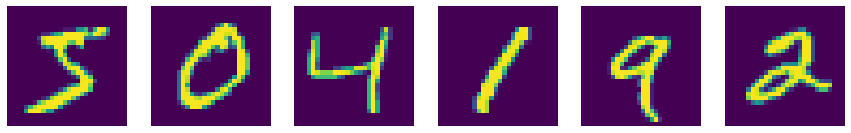

In [146]:
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axs[i].imshow(x_train[i])
#    axs[i].set_title(class_names[y_train[i][0]])
    axs[i].axis('off')
plt.show()

(60000, 28, 28)

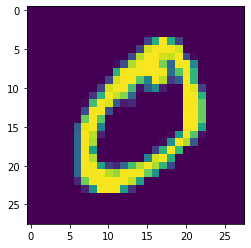

In [147]:
# Shows the shape of the train images (length, width, channel)
plt.imshow(x_train[1])
x_train

x_train[0].shape
x_train.shape

(28, 28)

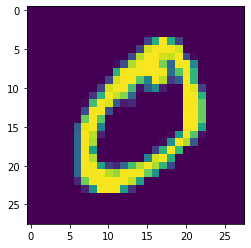

In [148]:
# Shows the shape of one of the train images (length, width, channel)
plt.imshow(x_train[1])
x_train
x_train[1].shape

In [45]:
#reshape to have access to every pixel of the image in training and testing dataset
#x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32')
#x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32')

In [149]:
# divide by 255 to normalize all pixel values to range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [150]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [151]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [152]:
x_train.shape

(60000, 28, 28)

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

### First Training with Dropout Regularization

In [158]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn
# For example 3D (8*8*64) becomes 4096 (8*8*64) after flatenning
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding = 'valid')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [159]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [156]:
 #Train the model with 20 epochs and batch size of 28
# to_categorical () converts integer class labels into one-hot encoded vectors;
# also used to convert predicted scores back into class labels for evaluation in classification problems
# batch_size=32: the training dataset is put into mini-batches of size 32.
#epochs=20: The model will be trained for 20 epochs;
#This means the dataset will be passed through the model 20 times for training.
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
2143/2143 [==============================] - 27s 13ms/step - loss: 0.6894 - accuracy: 0.7818 - val_loss: 0.1209 - val_accuracy: 0.9620
Epoch 2/20
2143/2143 [==============================] - 43s 20ms/step - loss: 0.1825 - accuracy: 0.9459 - val_loss: 0.0819 - val_accuracy: 0.9754
Epoch 3/20
2143/2143 [==============================] - 41s 19ms/step - loss: 0.1361 - accuracy: 0.9609 - val_loss: 0.0603 - val_accuracy: 0.9786
Epoch 4/20
2143/2143 [==============================] - 45s 21ms/step - loss: 0.1089 - accuracy: 0.9676 - val_loss: 0.0523 - val_accuracy: 0.9831
Epoch 5/20
2143/2143 [==============================] - 41s 19ms/step - loss: 0.0933 - accuracy: 0.9722 - val_loss: 0.0442 - val_accuracy: 0.9849
Epoch 6/20
2143/2143 [==============================] - 39s 18ms/step - loss: 0.0806 - accuracy: 0.9763 - val_loss: 0.0400 - val_accuracy: 0.9868
Epoch 7/20
2143/2143 [==============================] - 41s 19ms/step - loss: 0.0740 - accuracy: 0.9785 - val_loss: 0.0392 -

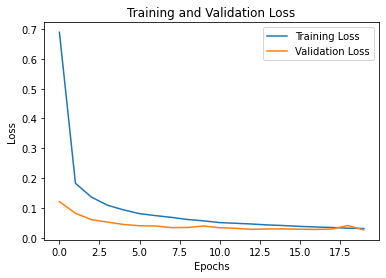

In [157]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


### Use of Dropout and Early Stopping Regularization 

In [160]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [161]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=3, 
    min_delta=0.001, 
    mode='max'
)

In [162]:
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)), callbacks=[custom_early_stopping])

Epoch 1/20
2143/2143 [==============================] - 47s 21ms/step - loss: 0.7108 - accuracy: 0.7735 - val_loss: 0.1273 - val_accuracy: 0.9578
Epoch 2/20
2143/2143 [==============================] - 45s 21ms/step - loss: 0.1824 - accuracy: 0.9448 - val_loss: 0.0813 - val_accuracy: 0.9729
Epoch 3/20
2143/2143 [==============================] - 43s 20ms/step - loss: 0.1337 - accuracy: 0.9598 - val_loss: 0.0673 - val_accuracy: 0.9789
Epoch 4/20
2143/2143 [==============================] - 44s 20ms/step - loss: 0.1085 - accuracy: 0.9674 - val_loss: 0.0541 - val_accuracy: 0.9830
Epoch 5/20
2143/2143 [==============================] - 43s 20ms/step - loss: 0.0912 - accuracy: 0.9730 - val_loss: 0.0503 - val_accuracy: 0.9843
Epoch 6/20
2143/2143 [==============================] - 49s 23ms/step - loss: 0.0797 - accuracy: 0.9755 - val_loss: 0.0454 - val_accuracy: 0.9855
Epoch 7/20
2143/2143 [==============================] - 48s 23ms/step - loss: 0.0703 - accuracy: 0.9788 - val_loss: 0.0412 -

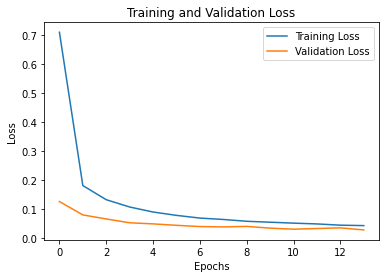

In [163]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


### Effect of Using L1/L2 Regularization Method

In [169]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn
# For example 3D (8*8*64) becomes 4096 (8*8*64) after flatenning
from tensorflow.keras import regularizers
model = Sequential()
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding = 'valid')
model.add(Conv2D(filters=32, kernel_size=(3, 3), kernel_regularizer=regularizers.L1L2(l1=0.02, l2=0.05),\
       input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3), kernel_regularizer=regularizers.L1L2(l1=0.02, l2=0.05), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3), kernel_regularizer=regularizers.L1L2(l1=0.02, l2=0.05), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [170]:
# print the summary of the model constructed
model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 2, 2, 128)      

In [171]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [172]:
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
2143/2143 [==============================] - 47s 22ms/step - loss: 5.4279 - accuracy: 0.1213 - val_loss: 2.3430 - val_accuracy: 0.1135
Epoch 2/20
2143/2143 [==============================] - 43s 20ms/step - loss: 2.3438 - accuracy: 0.1124 - val_loss: 2.3439 - val_accuracy: 0.1135
Epoch 3/20
2143/2143 [==============================] - 44s 20ms/step - loss: 2.3448 - accuracy: 0.1124 - val_loss: 2.3449 - val_accuracy: 0.1135
Epoch 4/20
2143/2143 [==============================] - 44s 21ms/step - loss: 2.3450 - accuracy: 0.1124 - val_loss: 2.3448 - val_accuracy: 0.1135
Epoch 5/20
2143/2143 [==============================] - 46s 21ms/step - loss: 2.3451 - accuracy: 0.1124 - val_loss: 2.3449 - val_accuracy: 0.1135
Epoch 6/20
2143/2143 [==============================] - 45s 21ms/step - loss: 2.3451 - accuracy: 0.1124 - val_loss: 2.3450 - val_accuracy: 0.1135
Epoch 7/20
2143/2143 [==============================] - 42s 20ms/step - loss: 2.3452 - accuracy: 0.1124 - val_loss: 2.3448 -

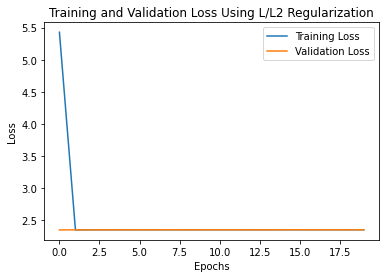

In [173]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss Using L/L2 Regularization')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


### Use Batch Normalization as Regularizer

In [207]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn
# For example 3D (8*8*64) becomes 4096 (8*8*64) after flatenning
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding = 'valid')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


In [208]:
# print the summary of the model constructed
model.summary()


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_123 (Conv2D)         (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 6, 6, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 2, 2, 128)      

In [209]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [210]:
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
2143/2143 [==============================] - 33s 15ms/step - loss: 0.1494 - accuracy: 0.9579 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 2/20
2143/2143 [==============================] - 46s 22ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0384 - val_accuracy: 0.9886
Epoch 3/20
2143/2143 [==============================] - 43s 20ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0316 - val_accuracy: 0.9902
Epoch 4/20
2143/2143 [==============================] - 42s 19ms/step - loss: 0.0264 - accuracy: 0.9925 - val_loss: 0.0288 - val_accuracy: 0.9900
Epoch 5/20
2143/2143 [==============================] - 50s 23ms/step - loss: 0.0212 - accuracy: 0.9941 - val_loss: 0.0261 - val_accuracy: 0.9912
Epoch 6/20
2143/2143 [==============================] - 48s 22ms/step - loss: 0.0171 - accuracy: 0.9957 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 7/20
2143/2143 [==============================] - 44s 20ms/step - loss: 0.0147 - accuracy: 0.9963 - val_loss: 0.0229 -

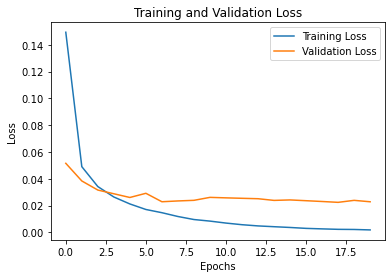

In [211]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


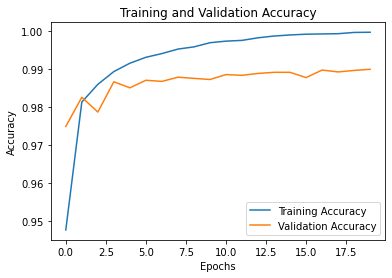

In [124]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


### Adding Additional CNN BLocks and Using Dropout and Early Stopping Regularizer

In [221]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn
# For example 3D (8*8*64) becomes 4096 (8*8*64) after flatenning
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu', padding = 'same'))
#model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(28,28,1),activation = 'relu',padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [222]:
# print the summary of the model constructed
model.summary()


Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_160 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_161 (Conv2D)         (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 6, 6, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_24 (Flatten)        (None, 2304)              0         
                                                                 
 dense_46 (Dense)            (None, 128)             

In [223]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [224]:
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
2143/2143 [==============================] - 27s 12ms/step - loss: 0.6926 - accuracy: 0.7792 - val_loss: 0.1599 - val_accuracy: 0.9497
Epoch 2/20
2143/2143 [==============================] - 35s 16ms/step - loss: 0.2108 - accuracy: 0.9373 - val_loss: 0.0940 - val_accuracy: 0.9706
Epoch 3/20
2143/2143 [==============================] - 35s 16ms/step - loss: 0.1549 - accuracy: 0.9537 - val_loss: 0.0755 - val_accuracy: 0.9752
Epoch 4/20
2143/2143 [==============================] - 34s 16ms/step - loss: 0.1260 - accuracy: 0.9620 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 5/20
2143/2143 [==============================] - 37s 17ms/step - loss: 0.1091 - accuracy: 0.9668 - val_loss: 0.0574 - val_accuracy: 0.9814
Epoch 6/20
2143/2143 [==============================] - 38s 18ms/step - loss: 0.0998 - accuracy: 0.9704 - val_loss: 0.0539 - val_accuracy: 0.9838
Epoch 7/20
2143/2143 [==============================] - 39s 18ms/step - loss: 0.0906 - accuracy: 0.9720 - val_loss: 0.0463 -

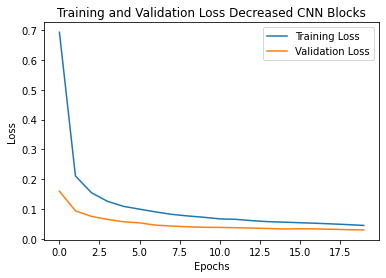

In [226]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss Decreased CNN Blocks')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


#### Effect of Varying the Learning Rate

In [198]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn
# For example 3D (8*8*64) becomes 4096 (8*8*64) after flatenning
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding = 'valid')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [199]:
# print the summary of the model constructed
model.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_108 (Conv2D)         (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_109 (Conv2D)         (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 2, 2, 128)      

In [201]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.01 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [202]:
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
2143/2143 [==============================] - 30s 14ms/step - loss: 0.2847 - accuracy: 0.9073 - val_loss: 0.0391 - val_accuracy: 0.9864
Epoch 2/20
2143/2143 [==============================] - 31s 15ms/step - loss: 0.0722 - accuracy: 0.9792 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 3/20
2143/2143 [==============================] - 31s 14ms/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 4/20
2143/2143 [==============================] - 32s 15ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0302 - val_accuracy: 0.9903
Epoch 5/20
2143/2143 [==============================] - 34s 16ms/step - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.0284 - val_accuracy: 0.9913
Epoch 6/20
2143/2143 [==============================] - 34s 16ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0271 - val_accuracy: 0.9915
Epoch 7/20
2143/2143 [==============================] - 34s 16ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0218 -

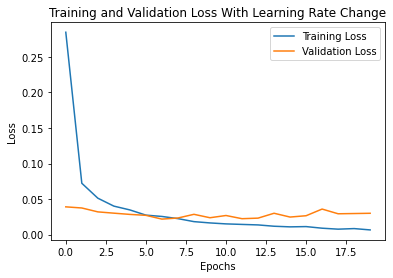

In [203]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss With Learning Rate Change')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


### Batch Normalization and Dropout

In [133]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn
# For example 3D (8*8*64) becomes 4096 (8*8*64) after flatenning
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation = 'relu',padding = 'valid')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


In [134]:
# print the summary of the model constructed
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 2, 2, 128)      

In [135]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
# and reduce the chance of getting stuck in local minima.
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [128]:
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
2143/2143 [==============================] - 46s 21ms/step - loss: 0.3042 - accuracy: 0.9073 - val_loss: 0.0771 - val_accuracy: 0.9772
Epoch 2/20
2143/2143 [==============================] - 51s 24ms/step - loss: 0.1143 - accuracy: 0.9661 - val_loss: 0.0557 - val_accuracy: 0.9840
Epoch 3/20
2143/2143 [==============================] - 48s 22ms/step - loss: 0.0854 - accuracy: 0.9746 - val_loss: 0.0534 - val_accuracy: 0.9842
Epoch 4/20
2143/2143 [==============================] - 49s 23ms/step - loss: 0.0710 - accuracy: 0.9785 - val_loss: 0.0465 - val_accuracy: 0.9856
Epoch 5/20
2143/2143 [==============================] - 52s 24ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 6/20
2143/2143 [==============================] - 61s 29ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 7/20
2143/2143 [==============================] - 49s 23ms/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0373 -

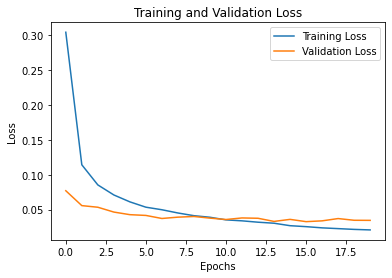

In [129]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


In [136]:
history=model.fit(x_train, keras.utils.to_categorical(y_train), batch_size=28, epochs=20, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)), callbacks=[custom_early_stopping])

Epoch 1/20
2143/2143 [==============================] - 39s 18ms/step - loss: 0.3022 - accuracy: 0.9088 - val_loss: 0.0908 - val_accuracy: 0.9738
Epoch 2/20
2143/2143 [==============================] - 40s 18ms/step - loss: 0.1164 - accuracy: 0.9665 - val_loss: 0.0558 - val_accuracy: 0.9842
Epoch 3/20
2143/2143 [==============================] - 41s 19ms/step - loss: 0.0859 - accuracy: 0.9740 - val_loss: 0.0510 - val_accuracy: 0.9846
Epoch 4/20
2143/2143 [==============================] - 41s 19ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.0433 - val_accuracy: 0.9870
Epoch 5/20
2143/2143 [==============================] - 40s 19ms/step - loss: 0.0627 - accuracy: 0.9813 - val_loss: 0.0419 - val_accuracy: 0.9867
Epoch 6/20
2143/2143 [==============================] - 42s 19ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0426 - val_accuracy: 0.9868
Epoch 7/20
2143/2143 [==============================] - 41s 19ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0422 -

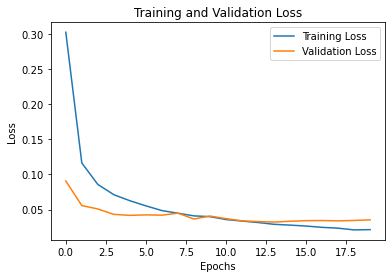

In [137]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


In [2]:
model.evaluate(x_test, y_test)

NameError: name 'model' is not defined